In [1]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import torch 
from torchvision import transforms, models
import cv2

In [3]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

c:\Users\Admin\anaconda3\envs\gumi_env310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\gumi_env310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:12<00:00, 19.8MB/s] 


In [4]:
model

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [5]:
labels = ['background','aeroplane','bicycle','bird','boat','bottle','bus','car','cat',
          'chair','cow','diningtable','dog','horse','motobike','person','pottedplant','sheep',
          'sofa','train','tvmonitor']
len(labels)

21

In [6]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [7]:
cmap = plt.get_cmap("tab20c")
colors = (cmap(np.arange(cmap.N))*255).astype('int')[:, 0:3].tolist()
colors

[[49, 130, 189],
 [107, 174, 214],
 [158, 202, 225],
 [198, 219, 239],
 [230, 85, 13],
 [253, 141, 60],
 [253, 174, 107],
 [253, 208, 162],
 [49, 163, 84],
 [116, 196, 118],
 [161, 217, 155],
 [199, 233, 192],
 [117, 107, 177],
 [158, 154, 200],
 [188, 189, 220],
 [218, 218, 235],
 [99, 99, 99],
 [150, 150, 150],
 [189, 189, 189],
 [217, 217, 217]]

In [8]:
np.random.seed(42)
np.random.shuffle(colors)
colors.insert(0, [0,0,0])
colors = np.array(colors, dtype=np.uint8)

palette_map = np.empty((10, 0, 3), dtype=np.uint8)
palette_map

array([], shape=(10, 0, 3), dtype=uint8)

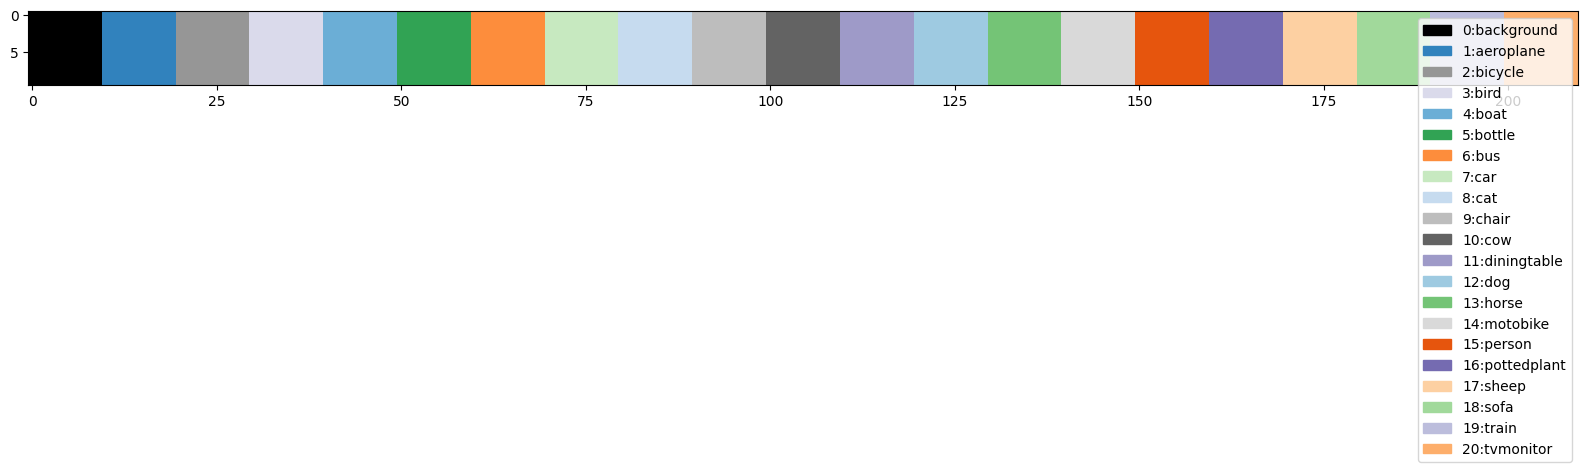

In [9]:
legend = []

for i in range(21):
    legend.append(mpatches.Patch(color=np.array(colors[i]) / 255. , label="%d:%s" % (i, labels[i])))
    c = np.full((10, 10, 3), colors[i], dtype=np.uint8)
    palette_map = np.concatenate([palette_map, c], axis=1)
    
plt.figure(figsize=(20, 2))
plt.legend(handles=legend)
plt.imshow(palette_map)

In [10]:
def segment(net, img):
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485,0.456,0.406],
            std=[0.229,0.224,0.225]
        )
    ])

    input_tensor = preprocess(img)   #채널,세로,가로
    input_batch = input_tensor.unsqueeze(0) #배치,채널,세로,가로

    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    output = model(input_batch)['out'][0]
    print(output[:,0,0])
    output_predictions = output.argmax(0).byte().cpu().numpy() # 가장 잘 예측한 내용만 가져오기
    print(output.argmax(0))
    r = Image.fromarray(output_predictions).resize((img.shape[1], img.shape[0]))
    r.putpalette(colors)

    return r,output_predictions

In [12]:
img = np.array(Image.open("h.jpg"))
segment_map, pred = segment(model, img)

tensor([10.0061, -0.4356, -1.7398, -2.0781, -1.0296,  0.0451, -0.7034,  0.0778,
        -1.3670,  0.8527, -2.6671,  2.5392, -2.3530, -2.3679, -1.8228,  0.8658,
         0.8723, -2.3170,  1.3354,  0.9635,  0.9346], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([[ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        ...,
        [18, 18, 18,  ..., 18, 18, 18],
        [18, 18, 18,  ..., 18, 18, 18],
        [18, 18, 18,  ..., 18, 18, 18]], device='cuda:0')


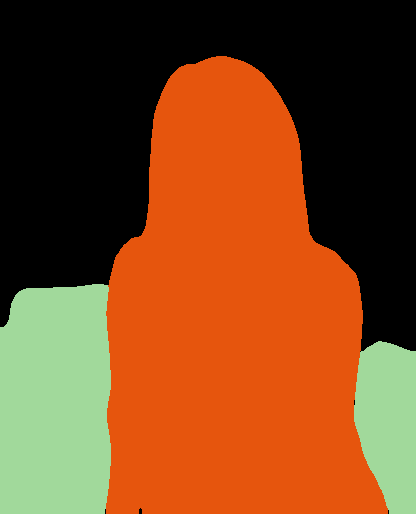

In [13]:
segment_map

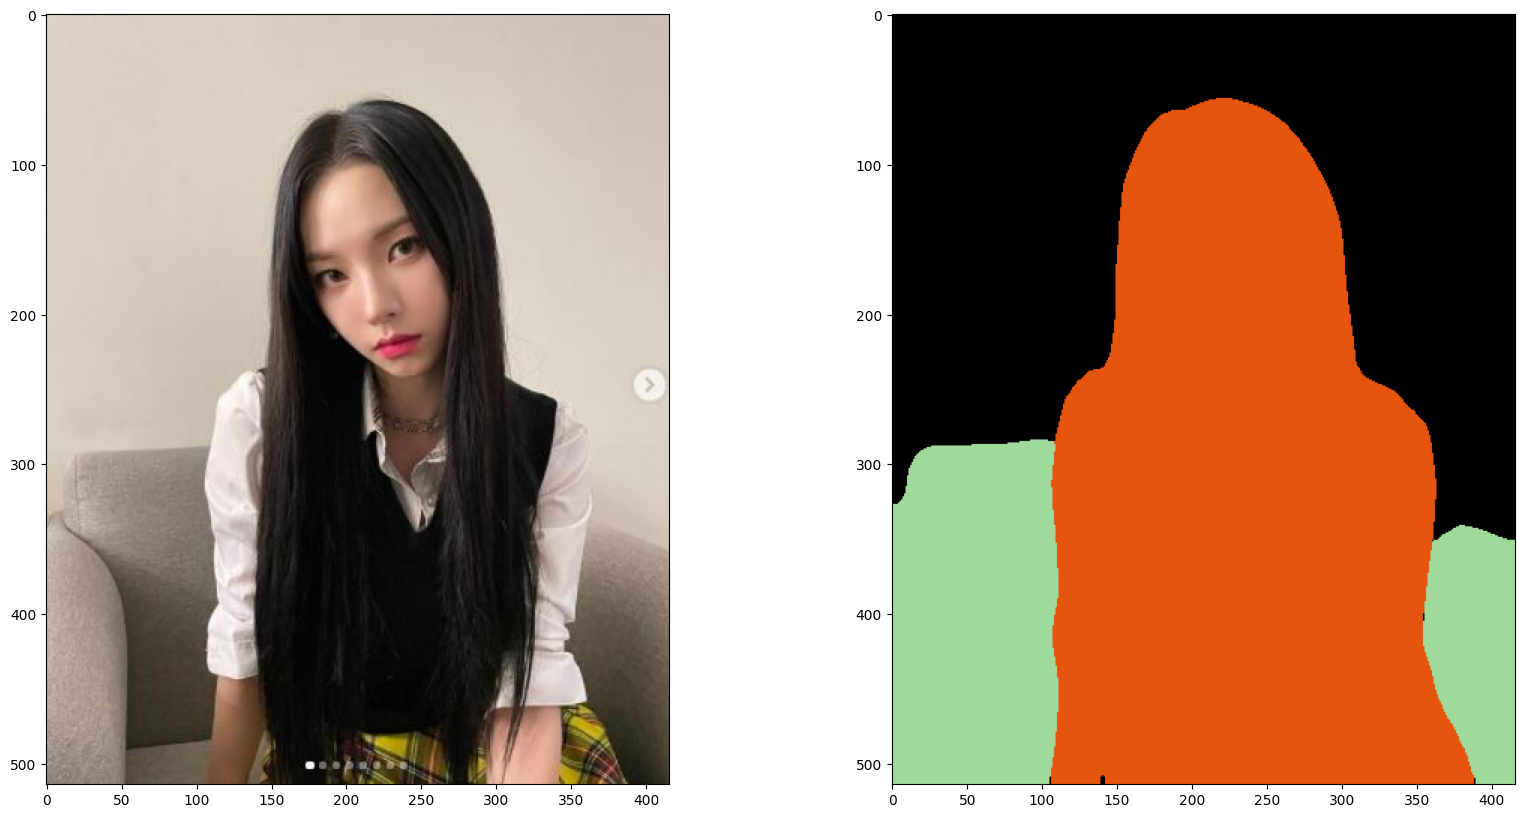

In [14]:
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].imshow(img)
axes[1].imshow(segment_map)

In [15]:
img.shape

(514, 416, 3)

In [17]:
background = np.array(Image.open('bg.jpg'))

fg_h, fg_w = img.shape[:2]
print(fg_h, fg_w)

514 416


In [18]:
bg_h, bg_w = background.shape[:2]
bg_h, bg_w

(720, 1280)

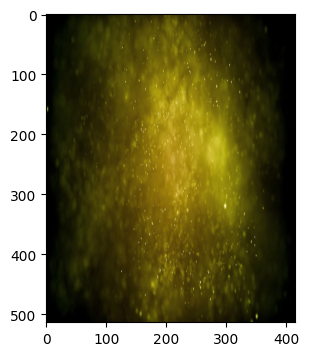

In [19]:
background = np.array(Image.open('bg.jpg'))
fg_h ,fg_w,_ = img.shape
bg_h , bg_w,_ = background.shape

background = cv2.resize(background, dsize=(fg_w, int(fg_w*bg_h / bg_w)))
bg_h , bg_w,_ = background.shape

margin = (bg_h - fg_h) // 2

if margin > 0:
    background = background[margin:-margin, :,:,]

background = cv2.resize(background,dsize=(fg_w,fg_h))
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
cv2.imwrite('bg_1.jpg',background)
plt.figure(figsize=(5,4))
plt.imshow(background)

In [20]:
pred[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
src = cv2.imread('h.jpg')
bg = cv2.imread('bg_1.jpg')
mask = (pred==15)
mask = mask.astype(float) * 255
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# 마스크의 픽셀값이 0보다 큰경우에는 255 설정하기
_, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

# 마스크에 가우시안 블러 -> 가장자리 부분이 부드럽게 처리되도록 9x9커널을 사용해서 처리
mask = cv2.GaussianBlur(mask, (9, 9), 0).astype(float)

# 0~ 1사이로 정규화
mask = mask / 255

In [23]:
# 3채널로 확장
mask = np.repeat(np.expand_dims(mask, axis=2), 3, axis=2)

In [24]:
foreground = cv2.multiply(mask.astype(float), src.astype(float))
cv2.imwrite('foreground.jpg', foreground)

True

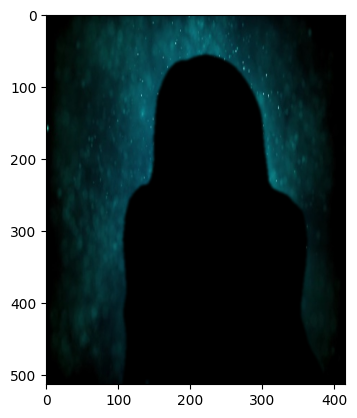

In [25]:
background_img = cv2.multiply(1 - mask.astype(float), bg.astype(float))
plt.imshow(cv2.cvtColor(background_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.show()

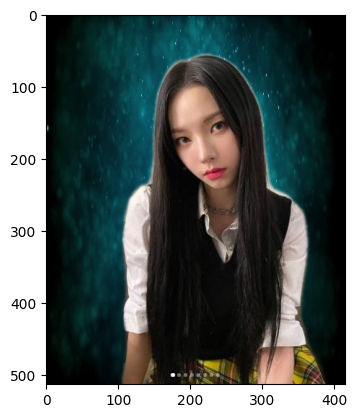

In [26]:
result = cv2.add(foreground.astype(float), background_img.astype(float))
plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.show()